### Projet : Analyse et Modélisation des Prix Médians des Maisons à Boston avec Régression Linéaire, Ridge et Lasso

#### Auteur : Fidèle Ledoux

### Résumé Explicatif
Ce projet vise à analyser le dataset BostonHousing pour prédire la valeur médiane des maisons (medv) en utilisant trois modèles de régression : linéaire classique, Ridge et Lasso. Nous explorons les données, étudions les corrélations entre les variables, et mettons en œuvre des techniques de régularisation pour améliorer les performances des modèles. Le modèle Lasso utilise une méthode automatique (LassoCV) pour choisir le meilleur paramètre de régularisation (λ). Les résultats sont comparés en termes de performance (RMSE, R²) et le meilleur modèle est sauvegardé pour une utilisation future.

### Importation des bibliothèques nécessaires

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib


1. Importation et exploration initiale du dataset

In [27]:
df = pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Affichage des informations générales

In [28]:
print("Informations sur le dataset :")
print(df.info())
print("\nStatistiques descriptives :")
print(df.describe())

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

Statistiques descriptives :
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     

Visualisation de la distribution des variables

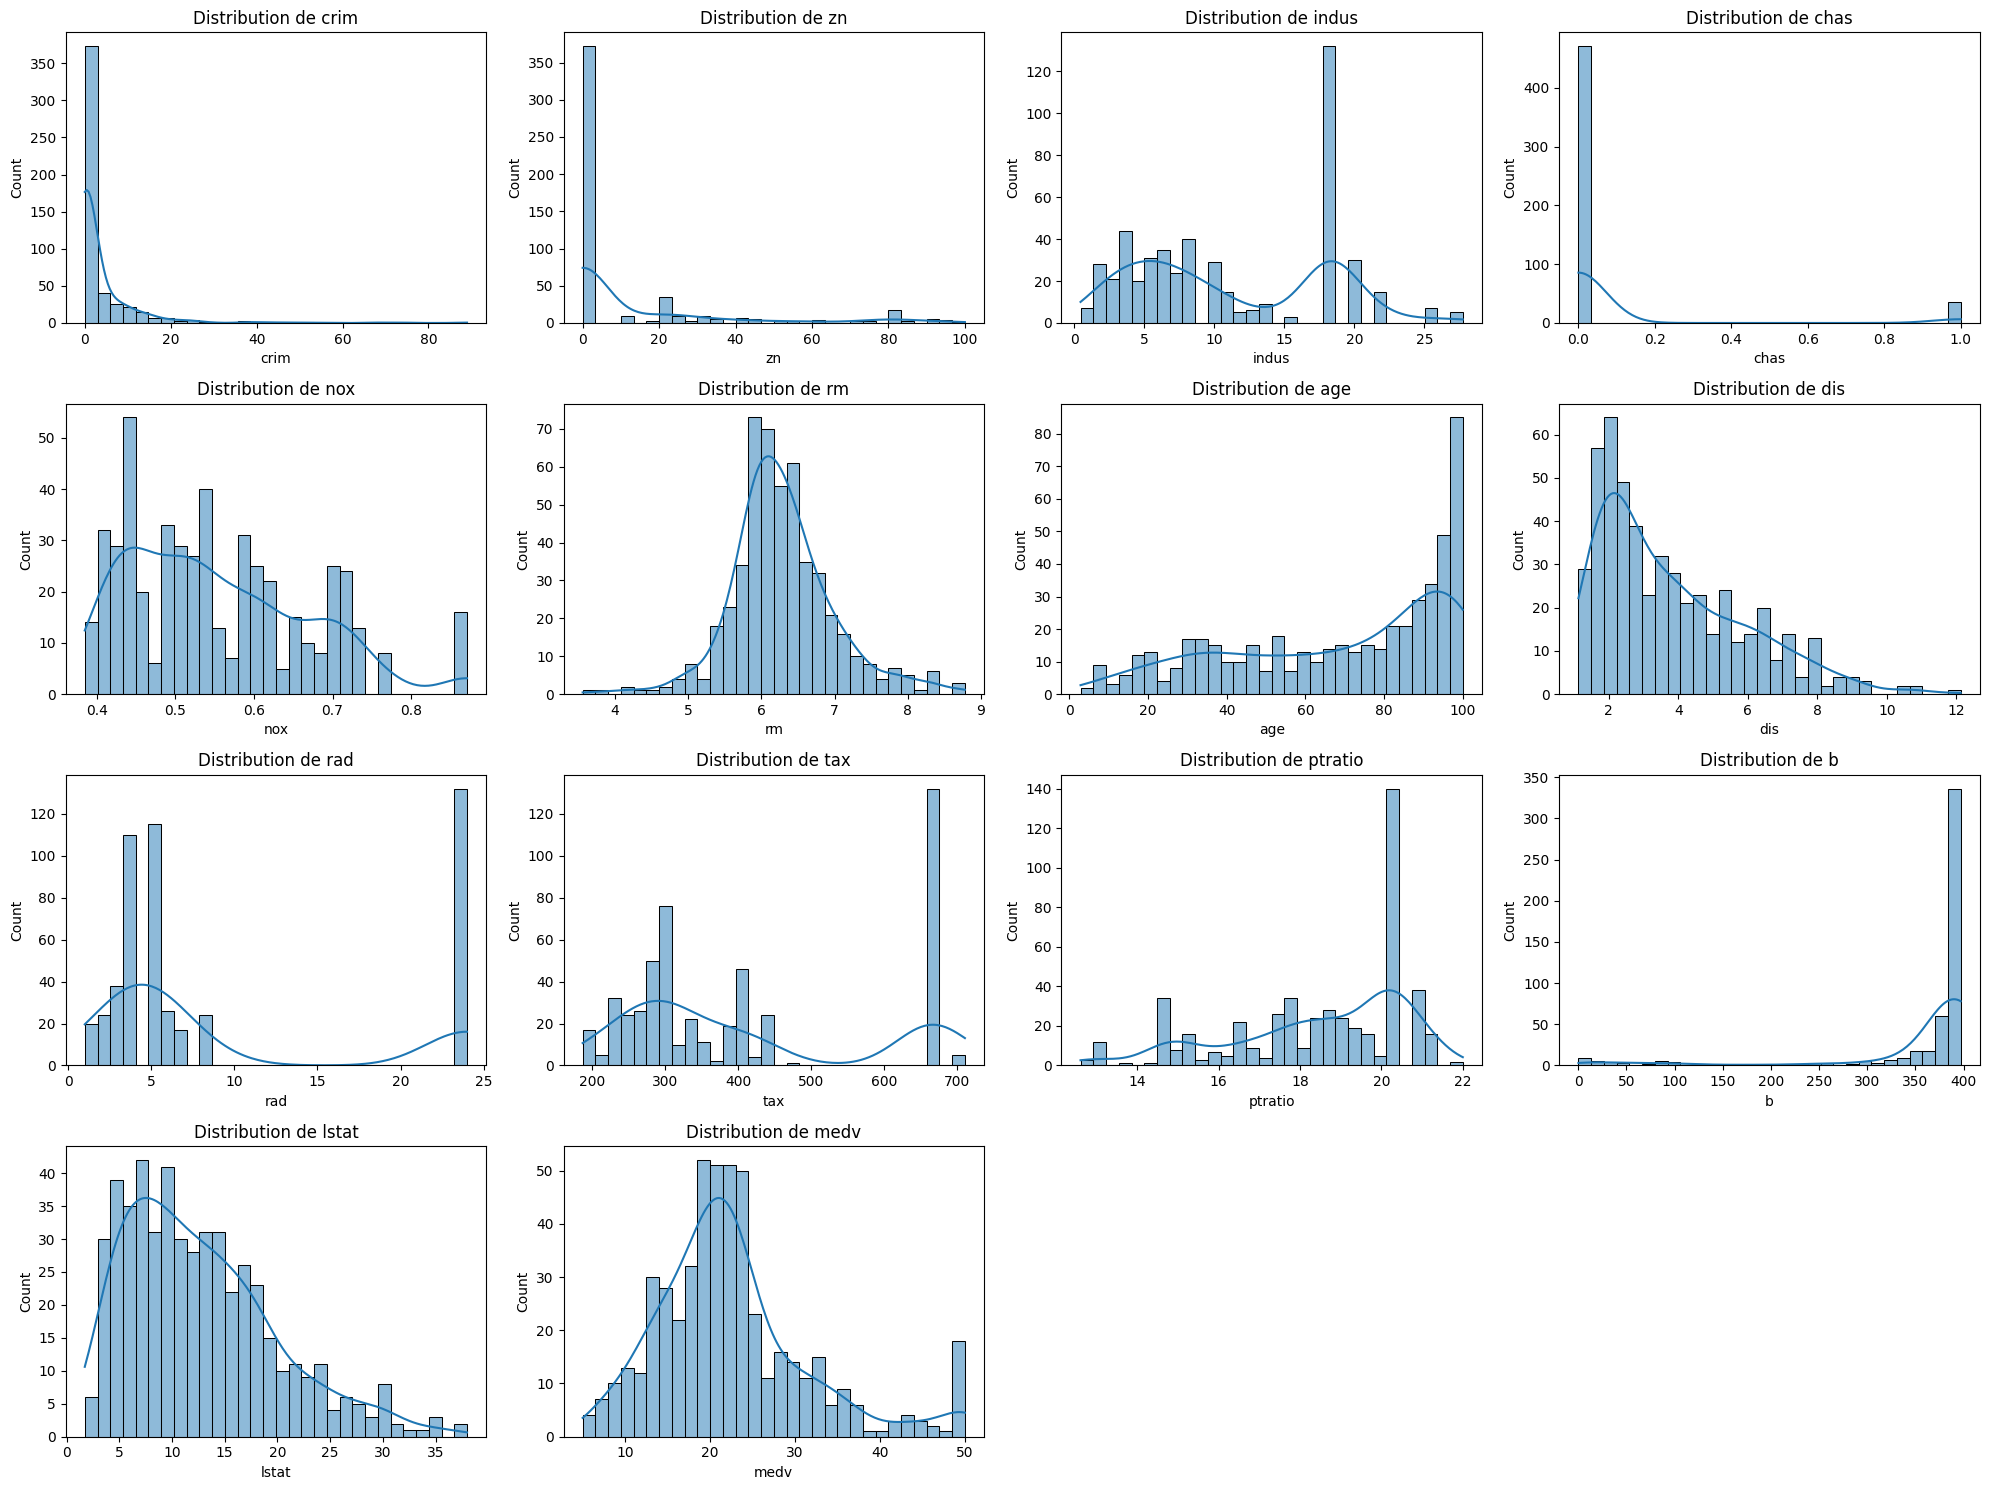

In [29]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution de {column}')
plt.tight_layout()
plt.show()

Commentaire : Ces visualisations permettent d'identifier les distributions des variables,
détecter les valeurs aberrantes potentielles et comprendre leur nature

2. Vérification des données manquantes

In [30]:
print("\n2. Vérification des données manquantes")
missing_data = df.isnull().sum()
print(missing_data)



2. Vérification des données manquantes
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


Commentaire : Aucune donnée manquante n'est présente dans ce dataset

3. Mise à l'échelle des données

In [31]:
print("\n3. Mise à l'échelle des données")
scaler = StandardScaler()


3. Mise à l'échelle des données


 4. Étude de la corrélation entre les variables


4. Matrice de corrélation


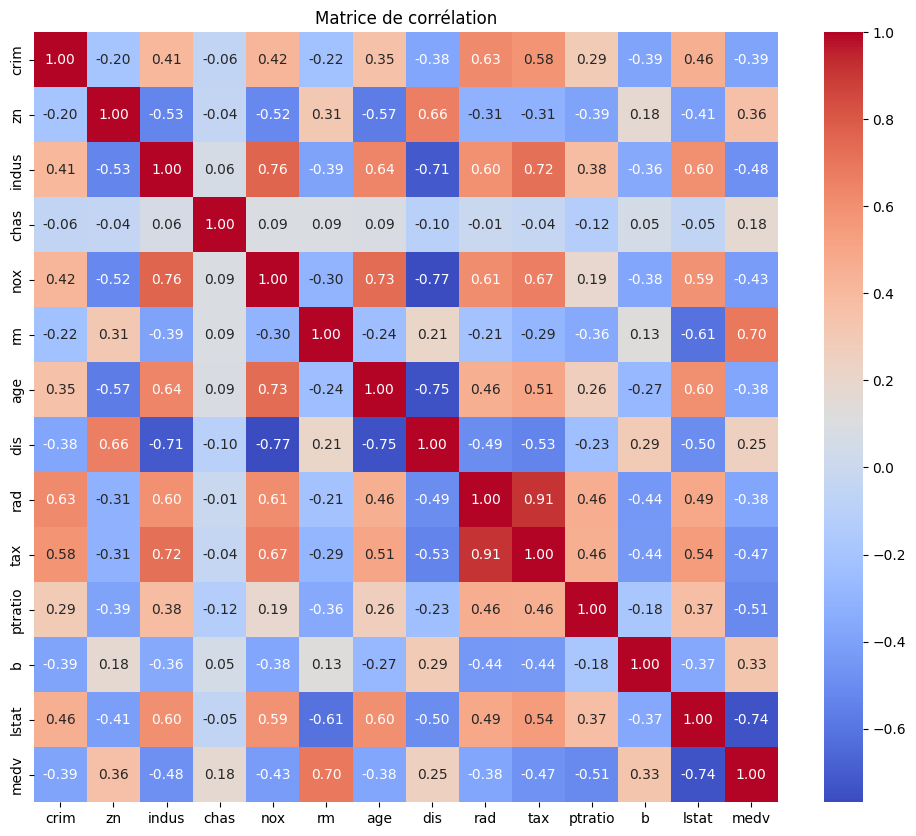

In [32]:
print("\n4. Matrice de corrélation")
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

 Commentaire : La variable `rm` (nombre moyen de pièces) montre une forte corrélation positive avec `medv`,
 tandis que `lstat` (statut socio-économique faible) a une forte corrélation négative.

5. Division des données en train et test

In [33]:
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mise à l'échelle

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6. Modèle de régression linéaire classique

In [35]:
print("\n6. Régression linéaire classique")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


6. Régression linéaire classique


LinearRegression()

Prédiction et évaluation

In [36]:
y_pred_lr_train = lr.predict(X_train_scaled)
y_pred_lr_test = lr.predict(X_test_scaled)

print("Régression Linéaire - Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_lr_train)))
print("Régression Linéaire - Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))
print("Régression Linéaire - R² Train:", r2_score(y_train, y_pred_lr_train))
print("Régression Linéaire - R² Test:", r2_score(y_test, y_pred_lr_test))

Régression Linéaire - Train RMSE: 4.6520331848801675
Régression Linéaire - Test RMSE: 4.928602182665336
Régression Linéaire - R² Train: 0.7508856358979673
Régression Linéaire - R² Test: 0.668759493535632


7. Modèle de régression LASSO avec LassoCV

In [37]:
print("\n7. Régression LASSO avec sélection automatique de λ via LassoCV")
lasso_cv = LassoCV(alphas=np.logspace(-4, 0, 100), cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)


7. Régression LASSO avec sélection automatique de λ via LassoCV


LassoCV(alphas=array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-0...
       1.17681195e-01, 1.29154967e-01, 1.41747416e-01, 1.55567614e-01,
       1.70735265e-01, 1.87381742e-01, 2.05651231e-01, 2.25701972e-01,
       2.47707636e-01, 2.71858824e-01, 2.98364724e-01, 3.27454916e-01,
       3.59381366e-01, 3.94420606e-01, 4.32876128e-01, 4.75081016e-01,
       5.21400829e-01, 5.72236766e-01, 6.28029144e-01, 6.89261210e-01,
       7.56463328e-01, 8.30217568e-01, 9.11162756e-01, 1.00000000e+00]),
        cv=5, max_iter=10000)

Meilleur alpha choisi par LassoCV

In [38]:
optimal_alpha_lasso = lasso_cv.alpha_
print(f"Meilleur alpha choisi par LassoCV : {optimal_alpha_lasso}")

Meilleur alpha choisi par LassoCV : 0.0001


Entraînement avec le meilleur alpha

In [39]:
lasso_optimal = Lasso(alpha=optimal_alpha_lasso, max_iter=10000)
lasso_optimal.fit(X_train_scaled, y_train)

Lasso(alpha=0.0001, max_iter=10000)

Évaluation

In [40]:
y_pred_lasso_train = lasso_optimal.predict(X_train_scaled)
y_pred_lasso_test = lasso_optimal.predict(X_test_scaled)

print("LASSO - Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)))
print("LASSO - Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("LASSO - R² Train:", r2_score(y_train, y_pred_lasso_train))
print("LASSO - R² Test:", r2_score(y_test, y_pred_lasso_test))

LASSO - Train RMSE: 4.652033261849022
LASSO - Test RMSE: 4.92863637234671
LASSO - R² Train: 0.7508856276546695
LASSO - R² Test: 0.6687548978932024


Nombre de variables éliminées

In [41]:
print("Nombre de variables éliminées:", sum(lasso_optimal.coef_ == 0))

Nombre de variables éliminées: 0


Visualisation des coefficients selon alpha

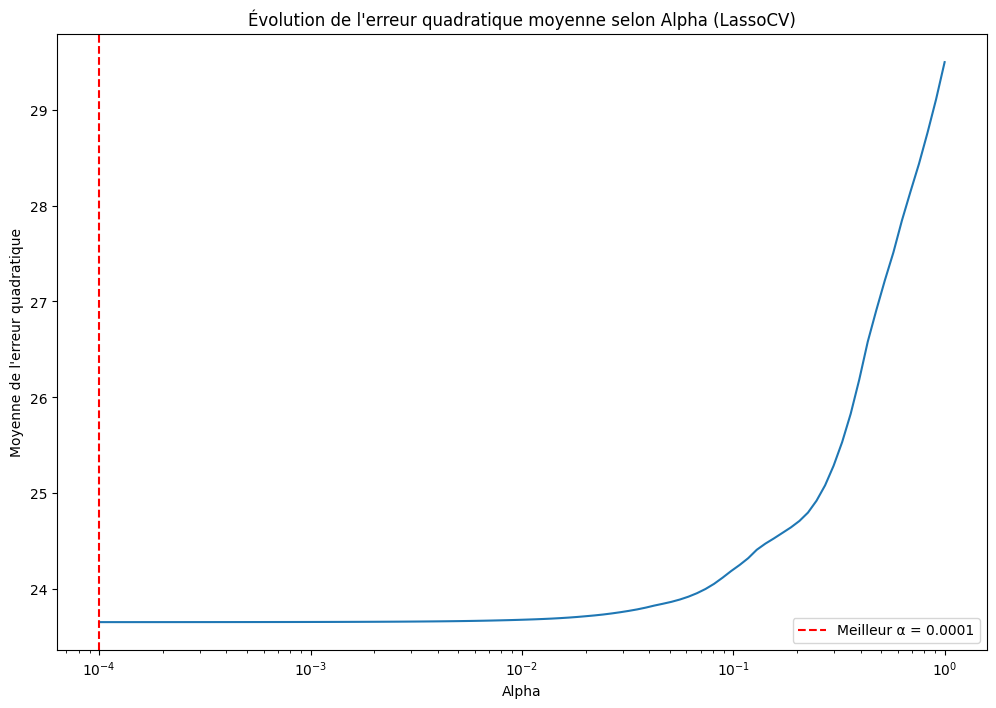

In [42]:
plt.figure(figsize=(12, 8))
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1))
plt.axvline(optimal_alpha_lasso, color='red', linestyle='--', label=f"Meilleur α = {optimal_alpha_lasso:.4f}")
plt.xlabel('Alpha')
plt.ylabel('Moyenne de l\'erreur quadratique')
plt.title('Évolution de l\'erreur quadratique moyenne selon Alpha (LassoCV)')
plt.legend()
plt.show()


 Commentaire : Cette visualisation montre comment l'erreur quadratique moyenne évolue avec différents α,
 et identifie le meilleur α choisi automatiquement

8. Modèle de régression RIDGE

In [43]:
print("\n8. Régression RIDGE avec sélection de α via GridSearchCV")
ridge = Ridge()
param_grid = {'alpha': np.logspace(-4, 4, 100)}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)



8. Régression RIDGE avec sélection de α via GridSearchCV


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3....
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

Meilleur alpha choisi par GridSearchCV

In [44]:
optimal_alpha_ridge = ridge_cv.best_params_['alpha']
print(f"Meilleur alpha choisi par GridSearchCV : {optimal_alpha_ridge}")

Meilleur alpha choisi par GridSearchCV : 2.310129700083163


Entraînement avec le meilleur alpha

In [45]:
ridge_optimal = Ridge(alpha=optimal_alpha_ridge)
ridge_optimal.fit(X_train_scaled, y_train)

Ridge(alpha=2.310129700083163)

Évaluation

In [46]:
y_pred_ridge_train = ridge_optimal.predict(X_train_scaled)
y_pred_ridge_test = ridge_optimal.predict(X_test_scaled)

print("RIDGE - Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_ridge_train)))
print("RIDGE - Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("RIDGE - R² Train:", r2_score(y_train, y_pred_ridge_train))
print("RIDGE - R² Test:", r2_score(y_test, y_pred_ridge_test))

RIDGE - Train RMSE: 4.652749943943474
RIDGE - Test RMSE: 4.93369651813757
RIDGE - R² Train: 0.7508088657088711
RIDGE - R² Test: 0.6680743814911678


Visualisation des coefficients selon alpha

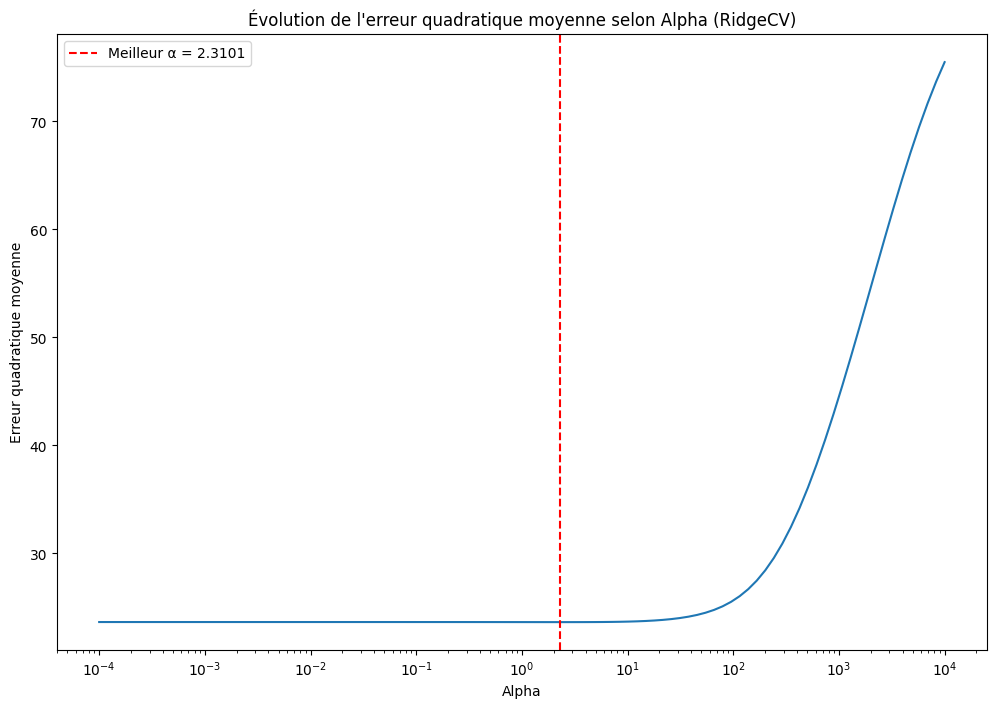

In [47]:
plt.figure(figsize=(12, 8))
plt.semilogx(param_grid['alpha'], [-score.mean() for score in ridge_cv.cv_results_['mean_test_score']])
plt.axvline(optimal_alpha_ridge, color='red', linestyle='--', label=f"Meilleur α = {optimal_alpha_ridge:.4f}")
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Évolution de l\'erreur quadratique moyenne selon Alpha (RidgeCV)')
plt.legend()
plt.show()

Commentaire : Cette visualisation montre comment l'erreur quadratique moyenne évolue avec différents α, et identifie le meilleur α choisi automatiquement.

9. Comparaison finale des modèles

In [48]:
print("\n9. Comparaison finale des modèles")
results = {
    "Modèle": ["Linéaire", "LASSO", "RIDGE"],
    "Train RMSE": [
        np.sqrt(mean_squared_error(y_train, y_pred_lr_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)),
        np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
    ],
    "Test RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
    ],
    "Train R²": [
        r2_score(y_train, y_pred_lr_train),
        r2_score(y_train, y_pred_lasso_train),
        r2_score(y_train, y_pred_ridge_train)
    ],
    "Test R²": [
        r2_score(y_test, y_pred_lr_test),
        r2_score(y_test, y_pred_lasso_test),
        r2_score(y_test, y_pred_ridge_test)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)



9. Comparaison finale des modèles
     Modèle  Train RMSE  Test RMSE  Train R²   Test R²
0  Linéaire    4.652033   4.928602  0.750886  0.668759
1     LASSO    4.652033   4.928636  0.750886  0.668755
2     RIDGE    4.652750   4.933697  0.750809  0.668074


### *Analyse comparative des performances*
Trois modèles ont été évalués sur leurs performances respectives en apprentissage (train) et en test à l’aide de deux métriques : la RMSE (Root Mean Squared Error) et le R² (coefficient de détermination).

 1. Modèle Linéaire
Train RMSE : 4.652

Test RMSE : 4.929

Train R² : 0.751

Test R² : 0.669

Le modèle linéaire présente une performance équilibrée entre les données d'entraînement et de test, avec une légère perte en généralisation. Cela indique qu’il s’ajuste relativement bien aux données sans trop de surapprentissage.

 2. LASSO (Régression avec pénalisation L1)
Les résultats sont quasiment identiques à ceux du modèle linéaire, avec une différence négligeable sur la RMSE et le R².

Cela suggère que la régularisation L1 n’a pas eu d’impact significatif ici, probablement parce que peu de variables étaient inutiles ou fortement corrélées.

 3. RIDGE (Régression avec pénalisation L2)
La RMSE et le R² sont très proches des deux autres modèles, mais on observe une légère baisse de performance en test (R² = 0.668).

Cela peut indiquer une pénalisation un peu trop forte ou que le modèle ne bénéficiait pas particulièrement de la régularisation dans ce contexte.

### *Conclusion générale*
Les performances sont très proches entre les trois modèles, ce qui montre que les données sont probablement bien adaptées à une régression linéaire simple.

L’ajout de régularisation (LASSO, RIDGE) n’améliore pas la performance, ce qui laisse penser qu’il n’y a ni surapprentissage ni colinéarité problématique.

Le modèle linéaire simple ressort donc comme le plus efficace et le plus interprétable dans ce cas précis.

Sauvegarde du meilleur modèle

In [49]:
best_model = ridge_optimal if results_df.loc[2, 'Test R²'] > results_df.loc[1, 'Test R²'] else lasso_optimal
joblib.dump(best_model, 'meilleur_modele.joblib')
print("\nMeilleur modèle sauvegardé dans 'meilleur_modele.joblib'")


Meilleur modèle sauvegardé dans 'meilleur_modele.joblib'
